## Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option("display.max_columns", None)

## Getting the dataset

In [2]:
df = pd.read_csv("data.csv", index_col="Unnamed: 0")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df.shape

(494021, 42)

In [4]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
df["label"] = df["label"].apply(lambda x: 0 if x=="normal." else 1)

In [6]:
df["label"].value_counts()

label
1    396743
0     97278
Name: count, dtype: int64

In [7]:
num_cols = df.select_dtypes(exclude="object").columns
cat_cols = df.select_dtypes(include="object").columns

## Analysis of Categorical Columns

In [8]:
cat_cols

Index(['protocol_type', 'service', 'flag'], dtype='object')

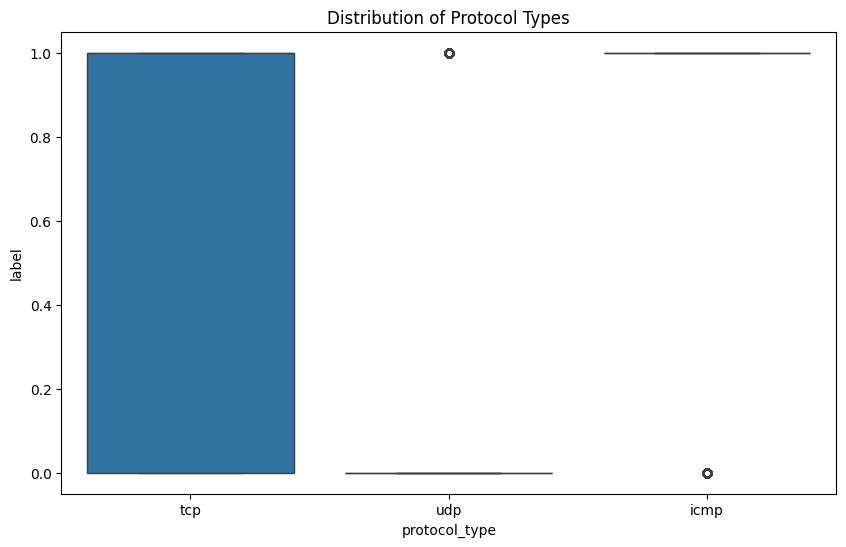

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["protocol_type"], y=df["label"])
plt.title("Distribution of Protocol Types")
plt.show()

<Axes: xlabel='protocol_type'>

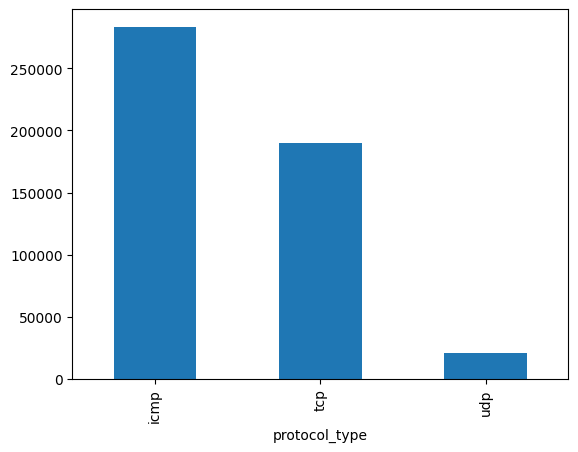

In [10]:
df["protocol_type"].value_counts().plot(kind="bar")

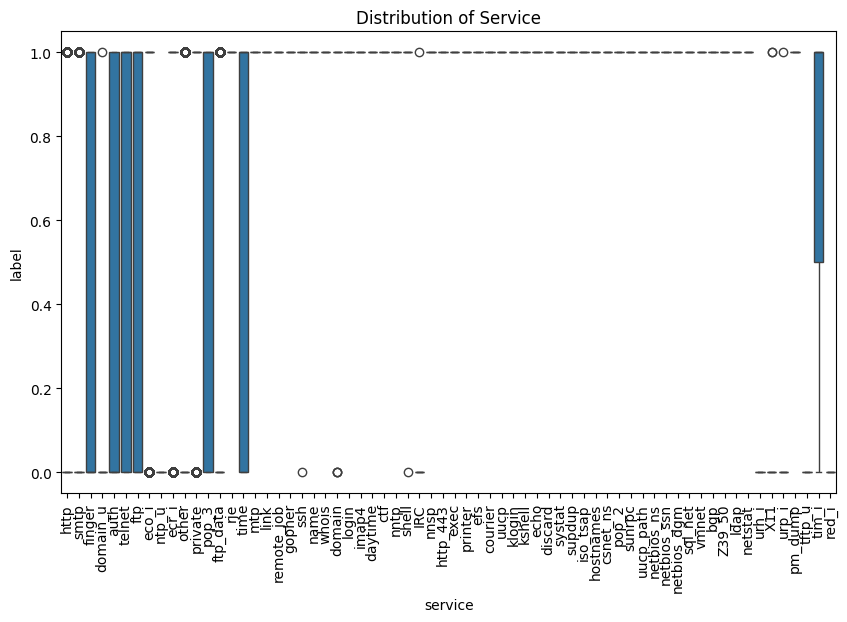

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["service"], y=df["label"])
plt.xticks(rotation=90)
plt.title("Distribution of Service")
plt.show()

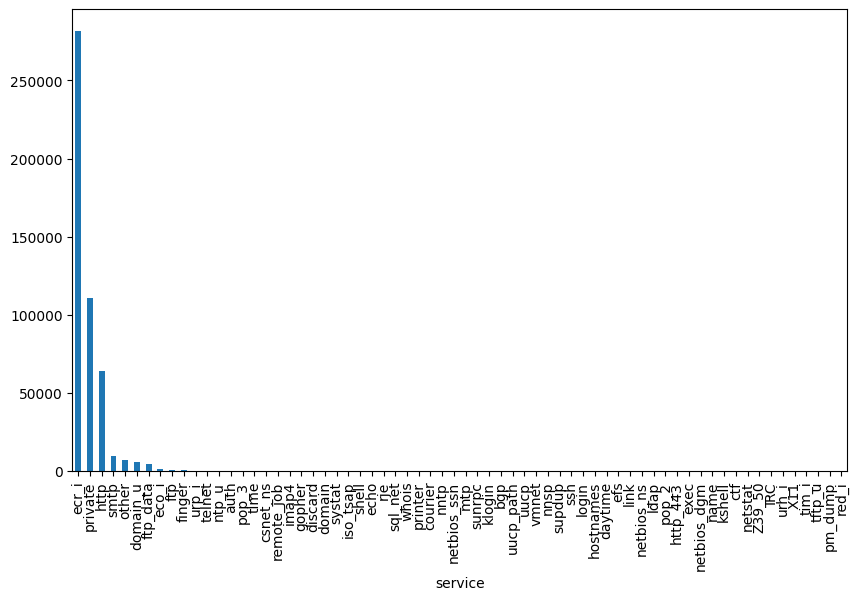

In [12]:
ax = plt.figure(figsize=(10, 6))
ax = df["service"].value_counts().plot(kind="bar")
plt.show(ax)

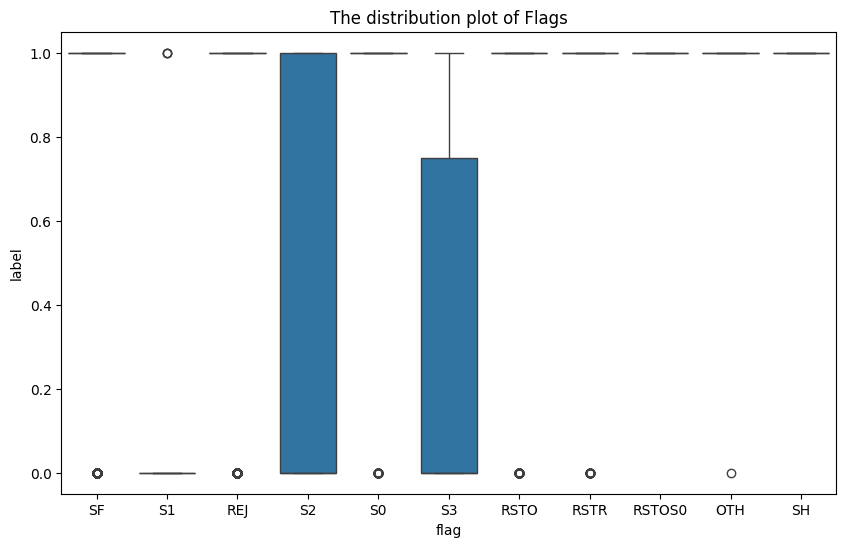

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["flag"], y=df["label"])
plt.title("The distribution plot of Flags")
plt.show()

<Axes: xlabel='flag'>

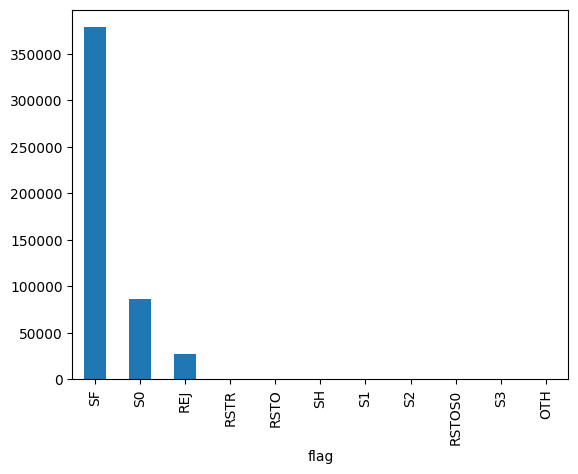

In [14]:
df["flag"].value_counts().plot(kind="bar")

In [15]:
le = LabelEncoder()
df["protocol_type"] = le.fit_transform(df["protocol_type"])
df["service"] = le.fit_transform(df["service"])
df["flag"] = le.fit_transform(df["flag"])

## Analysis of Numerical Columns

In [16]:
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

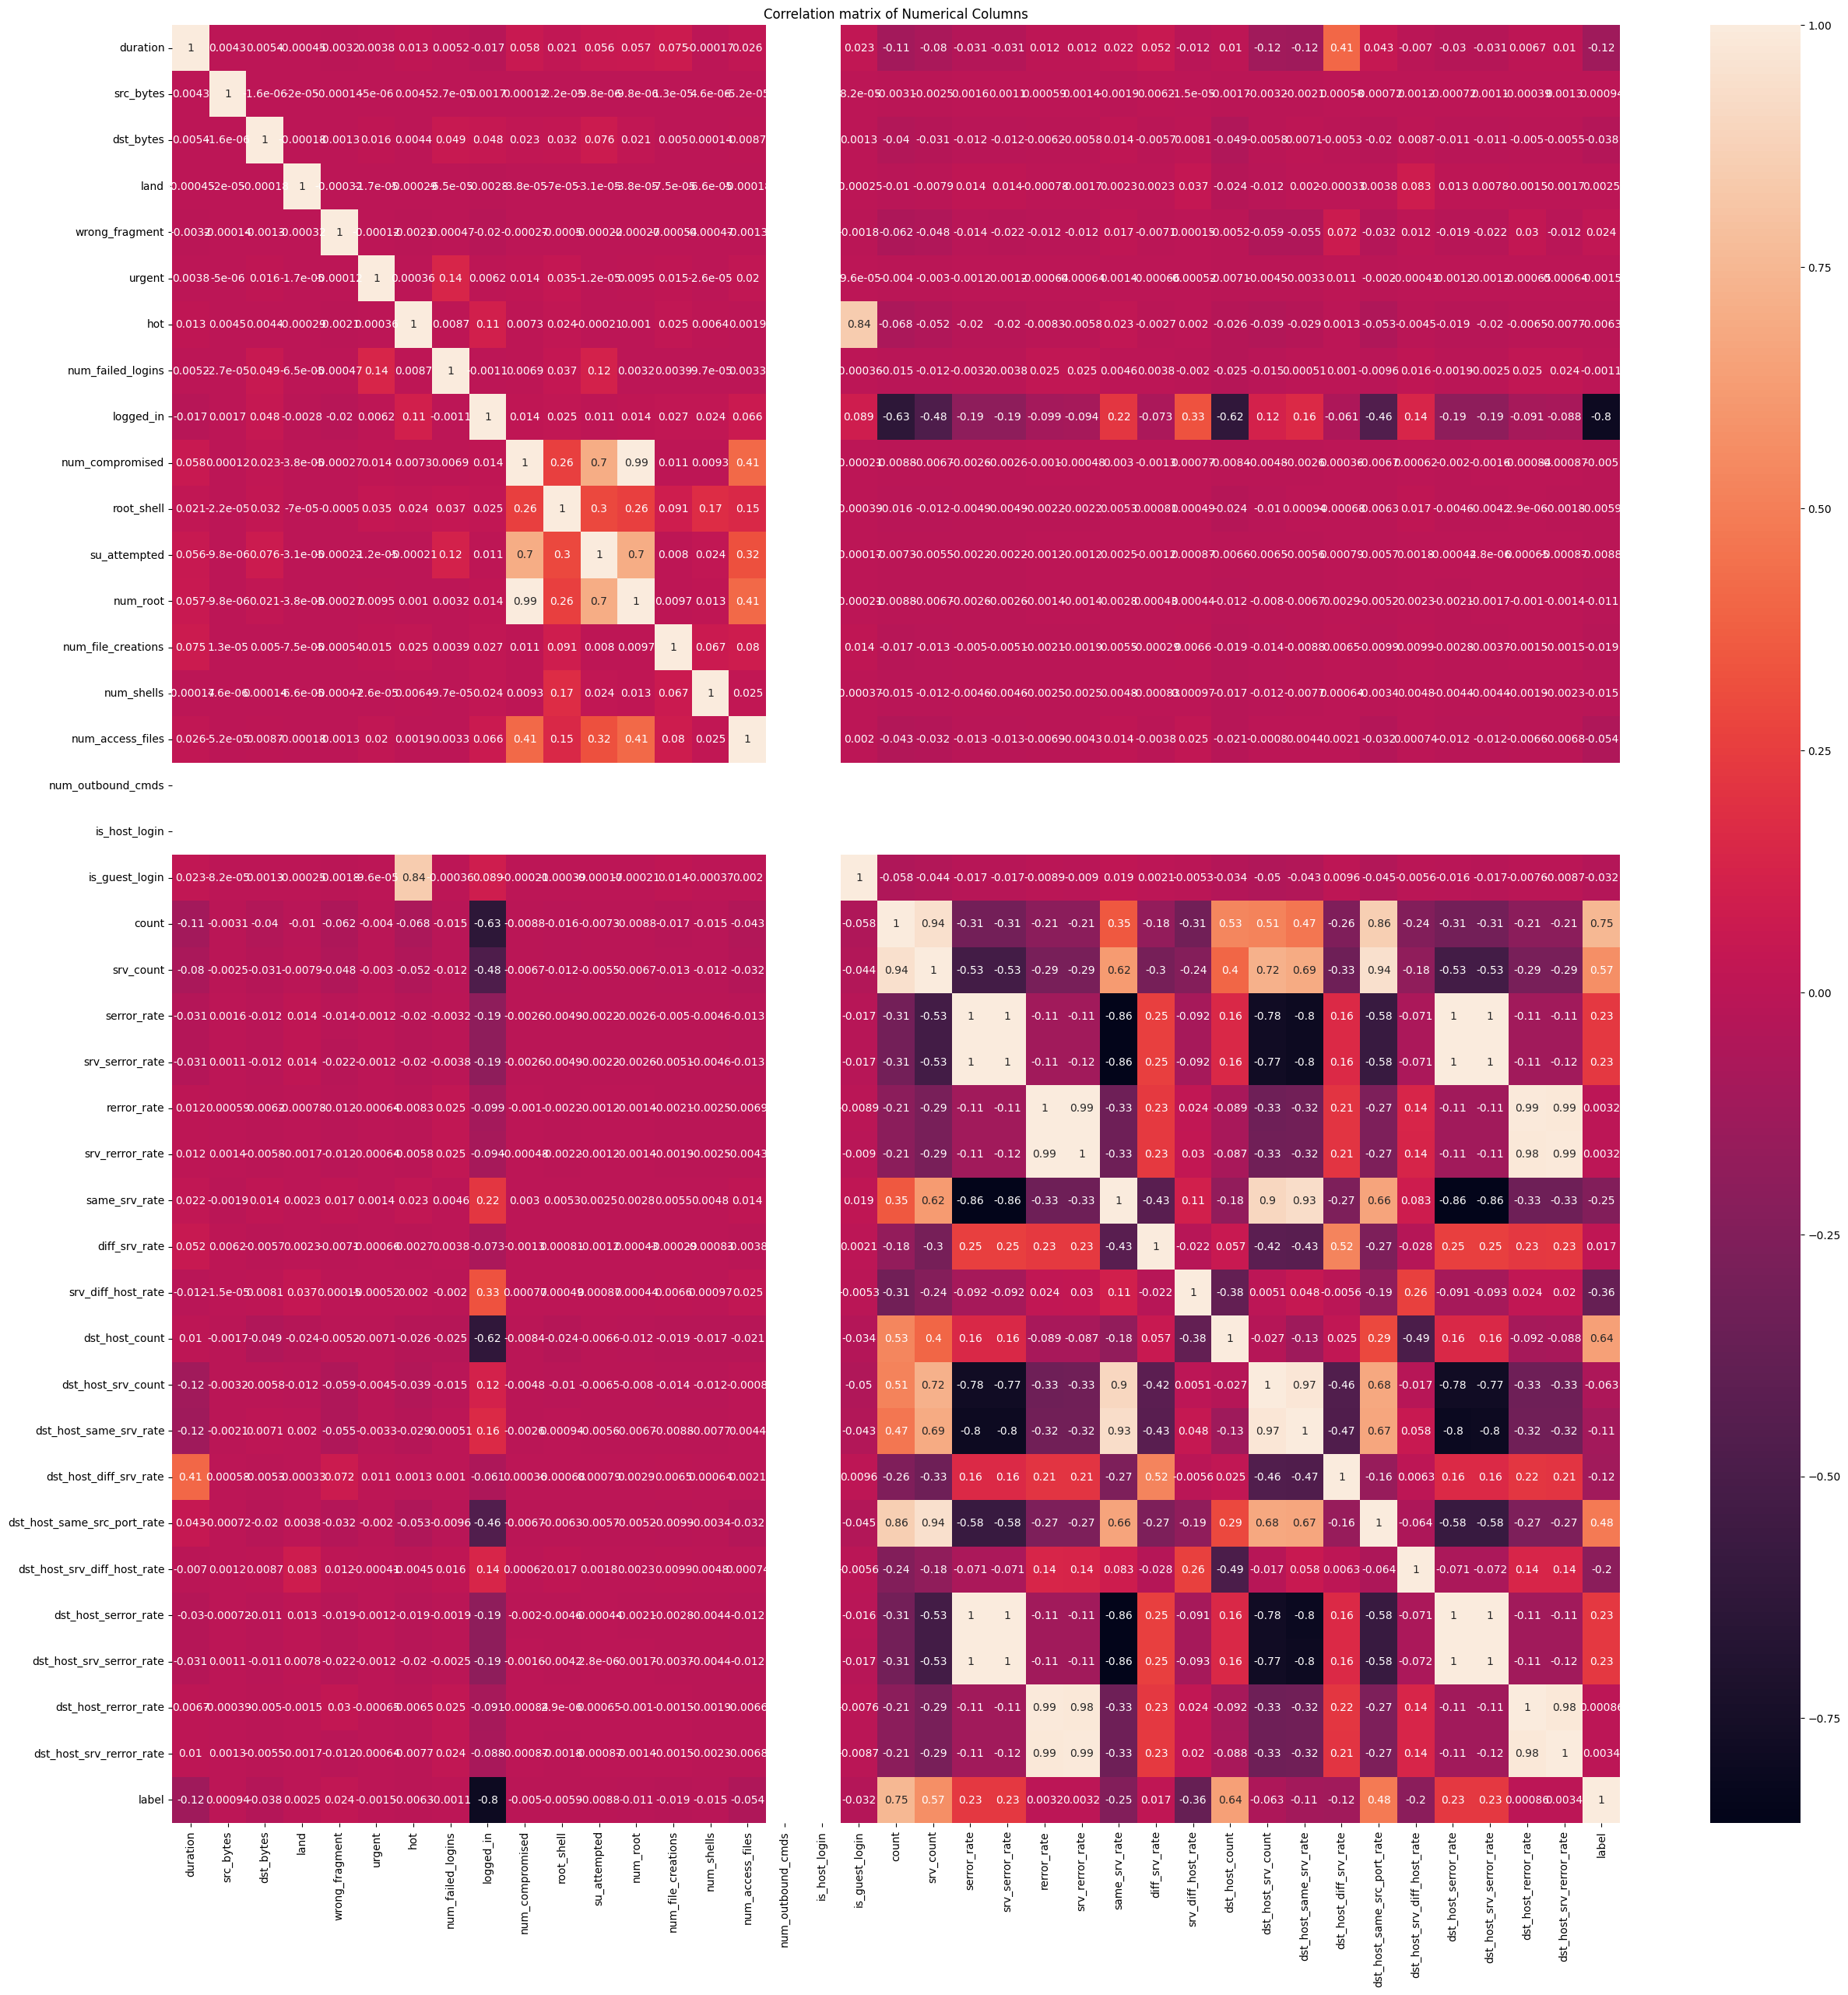

In [17]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix of Numerical Columns")
plt.show()

In [18]:
highly_correlated_label = num_cols[abs(df[num_cols].corr()["label"]) > 0.3]
df[highly_correlated_label].corr()["label"]

logged_in                     -0.795282
count                          0.752978
srv_count                      0.566829
srv_diff_host_rate            -0.364687
dst_host_count                 0.642110
dst_host_same_src_port_rate    0.481458
label                          1.000000
Name: label, dtype: float64

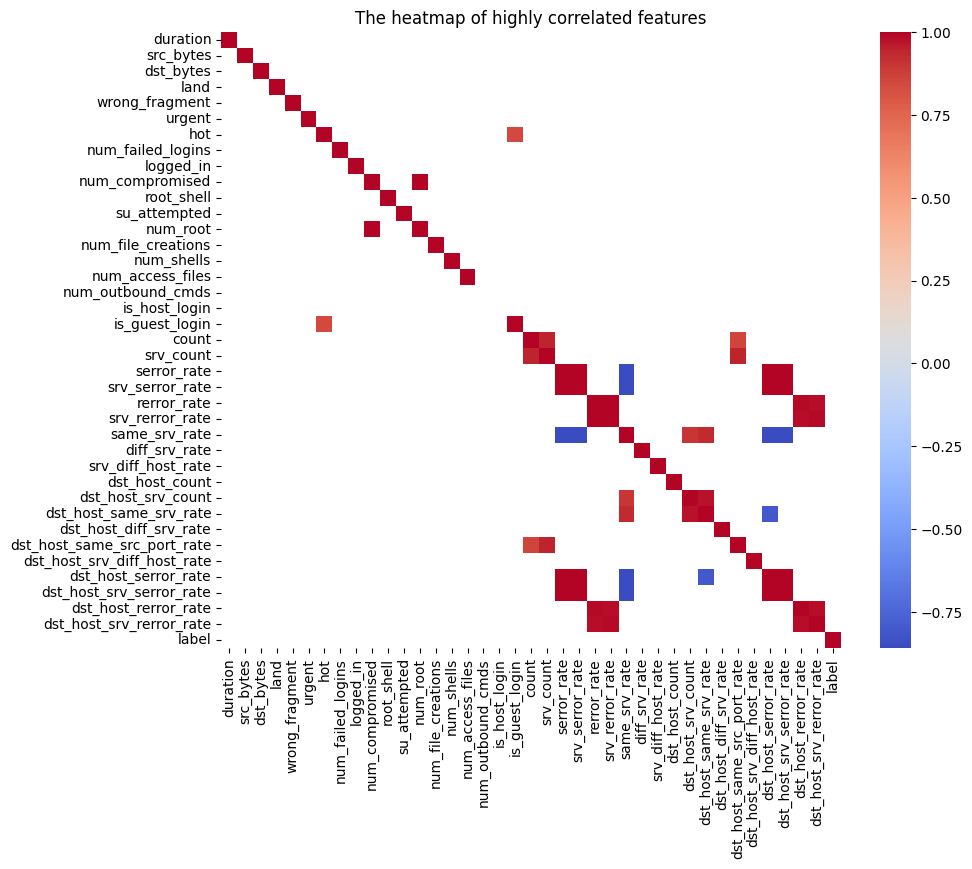

In [20]:
correlation_matrix = df[num_cols].corr()
mask = np.abs(correlation_matrix) > 0.8

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[mask], cmap="coolwarm")
plt.title("The heatmap of highly correlated features")
plt.show()

In [21]:
dct = {}

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        correlation = df[num_cols[i]].corr(df[num_cols[j]])
        if abs(correlation) > 0.95:
            dct[f"{num_cols[i]} and {num_cols[j]}"] = correlation

/home/murad/anaconda3/envs/ae/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/murad/anaconda3/envs/ae/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
dct

{'num_compromised and num_root': 0.9938277978738128,
 'serror_rate and srv_serror_rate': 0.9983615072725587,
 'serror_rate and dst_host_serror_rate': 0.9986729680105016,
 'serror_rate and dst_host_srv_serror_rate': 0.9978492485679915,
 'srv_serror_rate and dst_host_serror_rate': 0.9978353003739568,
 'srv_serror_rate and dst_host_srv_serror_rate': 0.9993041091849968,
 'rerror_rate and srv_rerror_rate': 0.9947309539818194,
 'rerror_rate and dst_host_rerror_rate': 0.986994792495607,
 'rerror_rate and dst_host_srv_rerror_rate': 0.9851995540751448,
 'srv_rerror_rate and dst_host_rerror_rate': 0.9821663427308442,
 'srv_rerror_rate and dst_host_srv_rerror_rate': 0.9865705438845721,
 'dst_host_srv_count and dst_host_same_srv_rate': 0.9736854572953938,
 'dst_host_serror_rate and dst_host_srv_serror_rate': 0.9981559173373277,
 'dst_host_rerror_rate and dst_host_srv_rerror_rate': 0.9848038371110385}

In [24]:
df.drop(["num_root", "srv_serror_rate", "dst_host_srv_serror_rate", "srv_rerror_rate",
        "dst_host_srv_rerror_rate", "dst_host_same_srv_rate", "dst_host_srv_serror_rate"], axis=1, inplace=True)

KeyError: "['num_root', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate'] not found in axis"

In [23]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,0.0,0.0,0


## Scaling

In [24]:
scaling_cols = ["service", "flag", "src_bytes", "dst_bytes", "count", "srv_count", "dst_host_count", "dst_host_srv_count"]

In [25]:
ss = StandardScaler()

for col in scaling_cols:
    df[col] = ss.fit_transform(df[col].values.reshape(-1, 1))

In [26]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,label
0,0,1,-0.104067,0.514274,-0.002879,0.138664,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.521417,-1.15664,0.0,0.0,1.0,0.0,0.0,-3.451536,-1.694315,0.0,0.11,0.0,0.0,0.0,0
1,0,1,-0.104067,0.514274,-0.002820,-0.011578,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.521417,-1.15664,0.0,0.0,1.0,0.0,0.0,-3.297085,-1.600011,0.0,0.05,0.0,0.0,0.0,0
2,0,1,-0.104067,0.514274,-0.002824,0.014179,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.521417,-1.15664,0.0,0.0,1.0,0.0,0.0,-3.142633,-1.505707,0.0,0.03,0.0,0.0,0.0,0
3,0,1,-0.104067,0.514274,-0.002840,0.014179,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.530800,-1.16476,0.0,0.0,1.0,0.0,0.0,-2.988182,-1.411403,0.0,0.03,0.0,0.0,0.0,0
4,0,1,-0.104067,0.514274,-0.002842,0.035214,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.530800,-1.16476,0.0,0.0,1.0,0.0,0.0,-2.833731,-1.317100,0.0,0.02,0.0,0.0,0.0,0


In [27]:
# df.to_csv("final_data.csv")